# Setup

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from causallift import CausalLift
from IPython.display import display

seed = 5

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [111]:
df = pd.read_csv('../data/CRIME_DATA_WITH_MICE_IMPUTED_DEMOGRAPHICS.csv')
df.columns

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Index(['Unnamed: 0', 'Description', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'Month', 'Hour', 'Year',
       'median_household_income', 'households_below_poverty', 'perc18_24',
       'perc25_64', 'perc65up', 'perc_asian', 'perc_aa', 'perc_hisp',
       'perc_white', 'median_price_homes_sold', 'racial_diversity_index',
       'num_households', 'Outside', 'Weapon_FIREARM', 'Weapon_HANDS',
       'Weapon_KNIFE', 'Weapon_NONE', 'Weapon_OTHER', 'Season_autumn',
       'Season_spring', 'Season_summer', 'Season_winter', 'Holiday',
       'Weekend'],
      dtype='object')

# Cleaning

In [114]:
df.drop(columns=['Unnamed: 0'], inplace=True)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [115]:
df.head(10)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Month,Hour,Year,...,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend
0,11,913.0,6,26,-76.60541,39.22951,69,9,23,2017,...,0,1,0,0,0,0,1,0,0,1
1,3,133.0,0,213,-76.63217,39.31360,78,9,23,2017,...,0,0,1,0,0,0,1,0,0,1
2,14,524.0,3,267,-76.60697,39.34768,78,9,22,2017,...,0,0,0,0,0,0,1,0,0,1
3,0,934.0,6,37,-76.64526,39.28315,69,9,22,2017,...,0,0,0,1,0,0,1,0,0,1
4,5,113.0,0,63,-76.61365,39.28756,78,9,22,2017,...,1,0,0,0,0,0,1,0,0,1
5,4,922.0,6,45,-76.62131,39.24867,69,9,22,2017,...,0,0,1,0,0,0,1,0,0,1
6,6,232.0,5,31,-76.56827,39.28202,78,9,21,2017,...,0,0,0,0,0,0,1,0,0,1
7,12,123.0,0,248,-76.62789,39.30254,78,9,21,2017,...,0,0,1,0,0,0,1,0,0,1
8,0,641.0,4,266,-76.68365,39.31370,78,9,21,2017,...,0,0,0,1,0,0,1,0,0,1
9,5,332.0,1,15,-76.57419,39.30551,69,9,21,2017,...,1,0,0,0,0,0,1,0,0,1


In [116]:
df['households_below_poverty'].dropna(inplace=True)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [118]:
df['households_below_poverty'].value_counts()

6.818182     7270
35.783245    6743
22.832903    6599
15.107775    6002
23.847087    5954
             ... 
9.894122      117
2.146893      104
24.788732      73
19.617187      72
22.574257      37
Name: households_below_poverty, Length: 180, dtype: int64

In [119]:
outcome_names = set(df['Description'].values)
outcome_names

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

# Is Below Average Poverty Treatment

In [132]:
cm_df = df.copy()
cm_df['households_below_poverty'] = cm_df['households_below_poverty'].dropna()
cm_df.reset_index(inplace=True)
households_below_avg_poverty = cm_df['households_below_poverty'].mean()
cm_df['Treatment'] = np.where(df['households_below_poverty'] <= households_below_avg_poverty, 1, 0)
cm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     263121 non-null  int64  
 1   Description               263121 non-null  int64  
 2   Post                      263121 non-null  float64
 3   District                  263121 non-null  int64  
 4   Neighborhood              263121 non-null  int64  
 5   Longitude                 263121 non-null  float64
 6   Latitude                  263121 non-null  float64
 7   Premise                   263121 non-null  int64  
 8   Month                     263121 non-null  int64  
 9   Hour                      263121 non-null  int64  
 10  Year                      263121 non-null  int64  
 11  median_household_income   263121 non-null  float64
 12  households_below_poverty  263121 non-null  float64
 13  perc18_24                 263121 non-null  f

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-06 18:23:39,712|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-06 18:23:39,730|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-06 18:23:39,800|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-06 18:23:39,801|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-06 18:23:39,815|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-06 18:23:39,831|kedro.pipeline.node|INFO] Running node: treatment_fractions_([args_raw,df_00]) -> [treatment_fractions]
[2021-04-06 18:23:39,847|kedro.runner.sequential_runner|INFO] Completed 1 out of 3 tasks
[2021-04-06 18:23:39,855|k

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
Liblinear failed to converge, increase the number of iterations.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend,Neighborhood,Premise,Month,Hour,Year,Outside
coefficient,0.065464,0.109385,-0.015153,0.450336,-0.029623,0.339061,0.287414,0.307796,0.314728,0.009823,-0.018822,-0.001529,-0.005468,0.001836,0.001057,-0.000204,0.107864


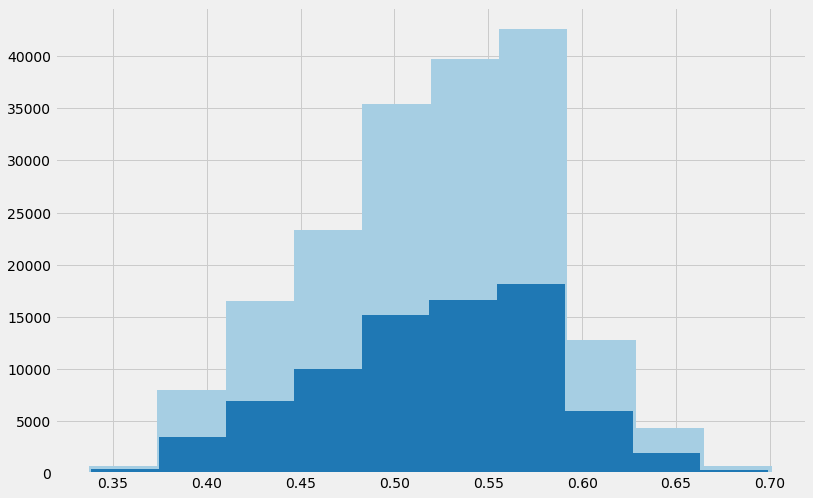

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,184184,2,0.549869,0.554885,0.686880,0.613867,0.543888,0.520914,0.644828
test,78937,2,0.549438,0.554609,0.685871,0.613295,0.543480,0.520922,0.644210


,Pred_0,Pred_1
True_0,35375,52865
True_1,30042,65902


,Pred_0,Pred_1
True_0,15168,22649
True_1,12917,28203


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.953379,0.721078,0.652722,0.685200,0.815721,0.077733,0.070364
test,41120,2,0.953624,0.722433,0.654352,0.686709,0.816590,0.077675,0.070355


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.938928,0.795048,0.664409,0.723882,0.820473,0.120490,0.100691
test,37817,2,0.938123,0.789391,0.663227,0.720830,0.819498,0.120448,0.101198


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.983042,0.685225,0.177778,0.282311,0.588108,0.018761,0.004867
test,41120,2,0.983001,0.663462,0.179922,0.283077,0.589094,0.018653,0.005058


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,95944,0.077733,95944,0.004867,0.062617
test,41120,0.077675,41120,0.005058,0.065122


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.906006,0.76032,0.716820,0.73793,0.832830,0.184610,0.174048
test,37817,2,0.905915,0.75963,0.717416,0.73792,0.833007,0.184626,0.174366


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,88240,0.120490,88240,0.174048,1.444507
test,37817,0.120448,37817,0.174366,1.447640


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.098217,0.08592,0.874793
test,78937,0.098167,0.08617,0.877791


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.098217,0.08592,0.874793
test,78937,0.098167,0.08617,0.877791


,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend,Neighborhood,Premise,Month,Hour,Year,Outside
coefficient,0.065464,0.109385,-0.015153,0.450336,-0.029623,0.339061,0.287414,0.307796,0.314728,0.009823,-0.018822,-0.001529,-0.005468,0.001836,0.001057,-0.000204,0.107864


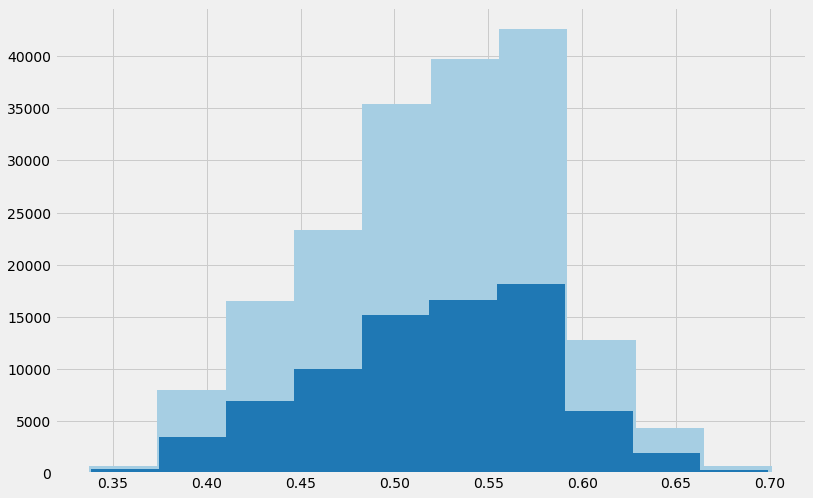

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,184184,2,0.549869,0.554885,0.686880,0.613867,0.543888,0.520914,0.644828
test,78937,2,0.549438,0.554609,0.685871,0.613295,0.543480,0.520922,0.644210


,Pred_0,Pred_1
True_0,35375,52865
True_1,30042,65902


,Pred_0,Pred_1
True_0,15168,22649
True_1,12917,28203


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.995477,0.0,0.0,0.0,0.5,0.004523,0.0
test,41120,2,0.995161,0.0,0.0,0.0,0.5,0.004839,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.994198,0.0,0.0,0.0,0.5,0.005802,0.0
test,37817,2,0.994077,0.0,0.0,0.0,0.5,0.005923,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.996748,0.0,0.0,0.0,0.5,0.003252,0.0
test,41120,2,0.996936,0.0,0.0,0.0,0.5,0.003064,0.0


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,95944,0.004523,95944,0.0,0.0
test,41120,0.004839,41120,0.0,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.992815,0.0,0.0,0.0,0.5,0.007185,0.0
test,37817,2,0.992146,0.0,0.0,0.0,0.5,0.007854,0.0


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,88240,0.005802,88240,0.0,0.0
test,37817,0.005923,37817,0.0,0.0


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.005136,0.0,0.0
test,78937,0.005359,0.0,0.0


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.005136,0.0,0.0
test,78937,0.005359,0.0,0.0


,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend,Neighborhood,Premise,Month,Hour,Year,Outside
coefficient,0.065464,0.109385,-0.015153,0.450336,-0.029623,0.339061,0.287414,0.307796,0.314728,0.009823,-0.018822,-0.001529,-0.005468,0.001836,0.001057,-0.000204,0.107864


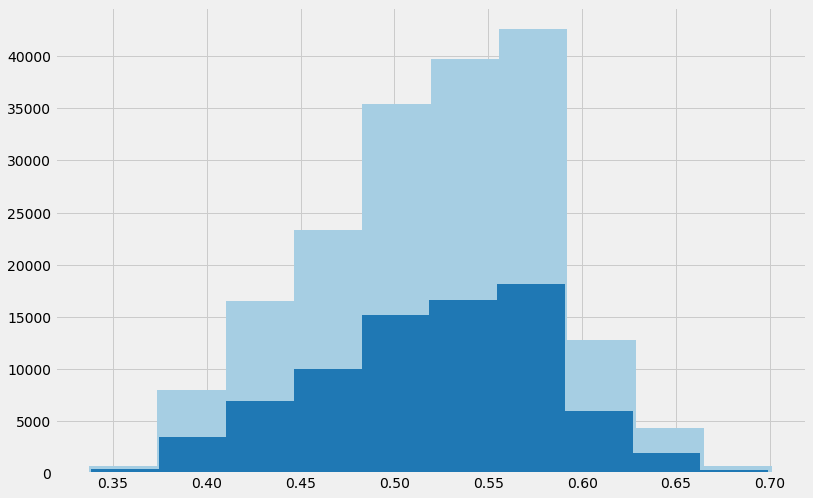

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,184184,2,0.549869,0.554885,0.686880,0.613867,0.543888,0.520914,0.644828
test,78937,2,0.549438,0.554609,0.685871,0.613295,0.543480,0.520922,0.644210


,Pred_0,Pred_1
True_0,35375,52865
True_1,30042,65902


,Pred_0,Pred_1
True_0,15168,22649
True_1,12917,28203


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.987524,0.0,0.0,0.0,0.5,0.012476,0.0
test,41120,2,0.986892,0.0,0.0,0.0,0.5,0.013108,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.987817,0.0,0.0,0.0,0.5,0.012183,0.0
test,37817,2,0.987228,0.0,0.0,0.0,0.5,0.012772,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.992204,0.0,0.0,0.0,0.5,0.007796,0.0
test,41120,2,0.992145,0.0,0.0,0.0,0.5,0.007855,0.0


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,95944,0.012476,95944,0.0,0.0
test,41120,0.013108,41120,0.0,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.982729,0.0,0.0,0.0,0.5,0.017271,0.0
test,37817,2,0.981516,0.0,0.0,0.0,0.5,0.018484,0.0


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,88240,0.012183,88240,0.0,0.0
test,37817,0.012772,37817,0.0,0.0


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.012335,0.0,0.0
test,78937,0.012947,0.0,0.0


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.012335,0.0,0.0
test,78937,0.012947,0.0,0.0


,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend,Neighborhood,Premise,Month,Hour,Year,Outside
coefficient,0.065464,0.109385,-0.015153,0.450336,-0.029623,0.339061,0.287414,0.307796,0.314728,0.009823,-0.018822,-0.001529,-0.005468,0.001836,0.001057,-0.000204,0.107864


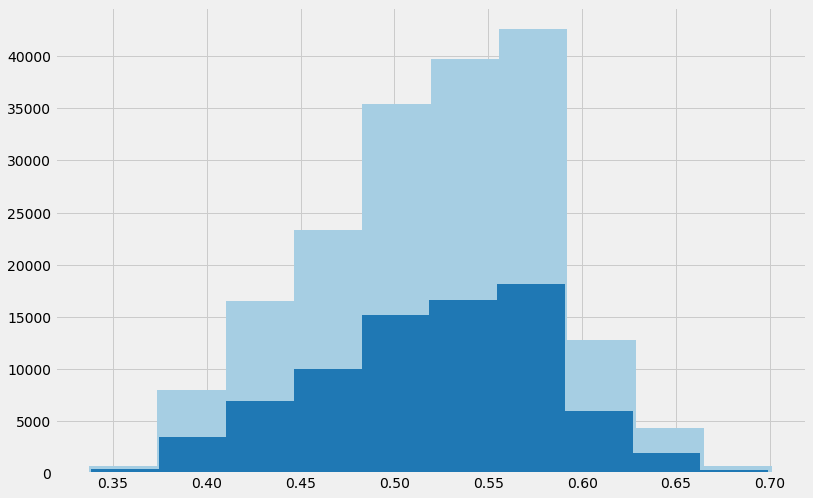

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,184184,2,0.549869,0.554885,0.686880,0.613867,0.543888,0.520914,0.644828
test,78937,2,0.549438,0.554609,0.685871,0.613295,0.543480,0.520922,0.644210


,Pred_0,Pred_1
True_0,35375,52865
True_1,30042,65902


,Pred_0,Pred_1
True_0,15168,22649
True_1,12917,28203


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.902891,0.0,0.0,0.0,0.5,0.097109,0.0
test,41120,2,0.905180,0.0,0.0,0.0,0.5,0.094820,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.901632,0.706522,0.007456,0.014756,0.503558,0.098799,0.001043
test,37817,2,0.903483,0.526316,0.005476,0.010840,0.502475,0.096570,0.001005


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.968867,0.0,0.0,0.0,0.5,0.031133,0.0
test,41120,2,0.969309,0.0,0.0,0.0,0.5,0.030691,0.0


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,95944,0.097109,95944,0.0,0.0
test,41120,0.094820,41120,0.0,0.0


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,88240,2,0.829408,0.487437,0.006446,0.012724,0.502526,0.170535,0.002255
test,37817,2,0.833488,0.451220,0.005883,0.011615,0.502228,0.166301,0.002168


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,88240,0.098799,88240,0.002255,0.022826
test,37817,0.096570,37817,0.002168,0.022453


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.097918,0.001080,0.011034
test,78937,0.095659,0.001039,0.010859


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,184184,0.097918,0.001080,0.011034
test,78937,0.095659,0.001039,0.010859


,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend,Neighborhood,Premise,Month,Hour,Year,Outside
coefficient,0.065464,0.109385,-0.015153,0.450336,-0.029623,0.339061,0.287414,0.307796,0.314728,0.009823,-0.018822,-0.001529,-0.005468,0.001836,0.001057,-0.000204,0.107864


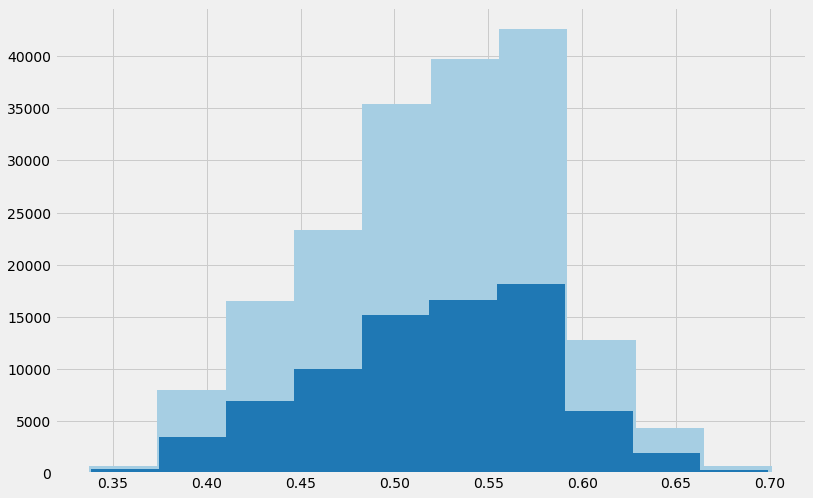

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,184184,2,0.549869,0.554885,0.686880,0.613867,0.543888,0.520914,0.644828
test,78937,2,0.549438,0.554609,0.685871,0.613295,0.543480,0.520922,0.644210


,Pred_0,Pred_1
True_0,35375,52865
True_1,30042,65902


,Pred_0,Pred_1
True_0,15168,22649
True_1,12917,28203


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,95944,2,0.903965,0.682859,0.738072,0.709393,0.836678,0.158811,0.171652
test,41120,2,0.903016,0.679612,0.738419,0.707796,0.836285,0.159071,0.172836


KeyboardInterrupt: 

In [133]:
for outcome in outcome_names:
    print('\n{}'.format(outcome))
    cm_df['Outcome'] = np.where(df['Description'] == outcome, 1, 0)
    cm_df = cm_df[['Treatment', 'Outcome',
                   'Weapon_FIREARM', 'Weapon_HANDS', 'Weapon_KNIFE', 'Weapon_NONE', 'Weapon_OTHER',
                   'Season_autumn', 'Season_spring', 'Season_summer', 'Season_winter',
                   'Holiday', 'Weekend', 'Neighborhood', 'Premise', 'Month', 'Hour', 'Year', 'Outside']]

    train_df, test_df = train_test_split(cm_df, test_size=0.3, random_state=seed, stratify=cm_df['Treatment'])

    print('\n[Estimate propensity scores for Inverse Probability Weighting.]')
    cl = CausalLift(train_df, test_df, enable_ipw=True, verbose=3)

    print('\n[Create 2 models for treatment and untreatment and estimate CATE (Conditional Average Treatment Effects)]')
    train_df, test_df = cl.estimate_cate_by_2_models()

    print('\n[Estimate the effect of recommendation based on the uplift model]')
    estimated_effect_df = cl.estimate_recommendation_impact()

    print('\n[Show the estimated effect of recommendation based on the uplift model]')
    display(estimated_effect_df)